In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle
import xgboost
%matplotlib inline

x_train = np.load('./Dataset/x_train.npy')
t_train = np.load('./Dataset/t_train.npy')

print('Training size', x_train.shape)

Training size (8944, 450)


In [2]:
start = time.time()
clf = SVC(gamma='auto', probability=True)
clf.fit(x_train, t_train)
end = time.time()

print('Time: ', end-start)
print('Accuracy: ', clf.score(x_train, t_train))
y_train_clf = clf.predict(x_train)
print('F1 score: ', f1_score(y_pred=y_train_clf, y_true=t_train))

pickle.dump(clf, open('./Models/svm.sav', 'wb'))

Time:  335.0766134262085
Accuracy:  0.9213998211091234
F1 score:  0.9224318658280922


In [3]:
proba = clf.predict_proba(x_train[0:1118])
proba = np.mean(proba, axis=0)
print(proba)

[0.01530732 0.98469268]


In [4]:
start = time.time()
rf = RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=3)
rf.fit(x_train, t_train)
end = time.time()

print('Time: ', end-start)
print('Score: ', rf.score(x_train, t_train))
y_train_rf = rf.predict(x_train)
print('F1 score: ', f1_score(y_pred=y_train_rf, y_true=t_train))

pickle.dump(rf, open('./Models/rf.sav', 'wb'))

Time:  36.806673765182495
Score:  0.9863595706618963
F1 score:  0.986543128171189


In [5]:
proba = rf.predict_proba(x_train[0:1118])
proba = np.mean(proba, axis=0)
print(proba)

[0.19365888 0.80634112]


In [8]:
start = time.time()
xgb = xgboost.XGBClassifier(n_estimators=2000, criterion='entropy', max_depth=3)
xgb.fit(x_train, t_train)
end = time.time()

print('Time: ', end-start)
print('Score: ', xgb.score(x_train, t_train))
y_train_xgb = xgb.predict(x_train)
print('F1 score: ', f1_score(y_pred=y_train_xgb, y_true=t_train))

pickle.dump(xgb, open('./Models/xgb.sav', 'wb'))

Time:  77.5137038230896
Score:  1.0
F1 score:  1.0


In [9]:
proba = xgb.predict_proba(x_train[0:1118])
proba = np.mean(proba, axis=0)
print(proba)

[3.1292246e-04 9.9968708e-01]


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_train)
x_reduce = pca.transform(x_train)

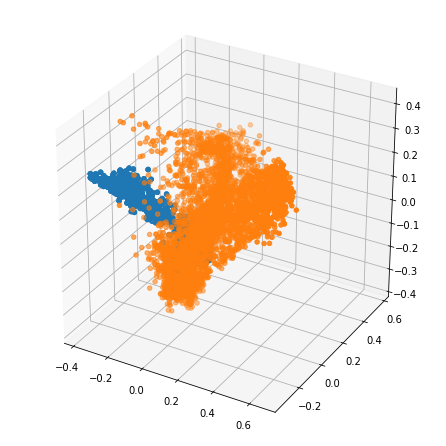

In [13]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline 

fig = plt.figure(figsize=(6, 6))
ax = Axes3D(fig)
ax.scatter(x_reduce[0:1118*4, 0], x_reduce[0:1118*4, 1], x_reduce[0:1118*4, 2])
ax.scatter(x_reduce[1118*4:, 0], x_reduce[1118*4:, 1], x_reduce[1118*4:, 2])
plt.show()

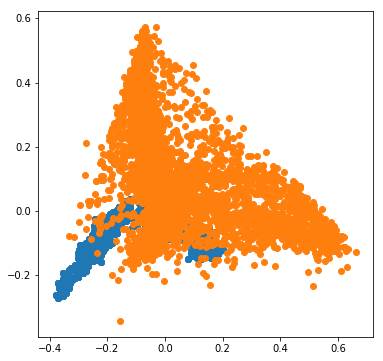

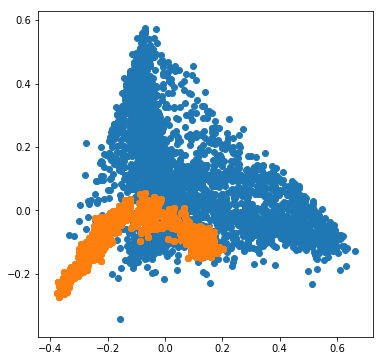

In [14]:
%matplotlib inline 
plt.figure(figsize=(6, 6))
plt.scatter(x_reduce[0:1118*4, 0], x_reduce[0:1118*4, 1])
plt.scatter(x_reduce[1118*4:, 0], x_reduce[1118*4:, 1])
plt.show()

%matplotlib inline 
plt.figure(figsize=(6, 6))
plt.scatter(x_reduce[1118*4:, 0], x_reduce[1118*4:, 1])
plt.scatter(x_reduce[0:1118*4, 0], x_reduce[0:1118*4, 1])
plt.show()